客户基本信息 - 9：<br>
MEMBER_NO	 		会员卡号<br>
FFP_DATE			入会时间<br>
FIRST_FLIGHT_DATE	第一次飞行日期<br>
GENDER				性别<br>
FFP_TIER			会员卡级别<br>
WORK_CITY			工作地城市<br>
WORK_PROVINCE	   	工作地所在省份你<br>
WORK_COUNTRY   		工作地所在国家<br>
AGE   				年龄<br>

乘机信息 - 21：<br>
LOAD_TIME			观测窗口的结束时间<br>
FLIGHT_COUNT		飞行次数<br>
BP_SUM				观测窗口总基本积分<br>
EP_SUM_YR_1			第一年精英资格积分<br>
EP_SUM_YR_2			第二年精英资格积分<br>
SUM_YR_1			第一年总票价<br>
SUM_YR_2			第二年总票价<br>
SEG_KM_SUM			观测窗口总飞行公里数<br>
WEIGHTED_SEG_KM		观测窗口总加权飞行公里数（Σ舱位折扣×航段距离）<br>
LAST_FLIGHT_DATE	末次飞行日期<br>
AVG_FLIGHT_COUNT	观测窗口季度平均飞行次数<br>
AVG_BP_SUM			观测窗口季度平均基本积分累积<br>
BEGIN_TO_FIRST		观察窗口内第一次乘机时间至MAX（观察窗口始端，入会时间）时长<br>
LAST_TO_END			最后一次乘机时间至观察窗口末端时长<br>
AVG_INTERVAL		平均乘机时间间隔<br>
MAX_INTERVAL		观察窗口内最大乘机间隔<br>
AVG_DISCOUNT		平均折扣率<br>
P1Y_Flight_Count 	第1年乘机次数	<br>
L1Y_Flight_Count	第2年乘机次数<br>
Ration_L1Y_Flight_Count	第2年的乘机次数比率<br>
Ration_P1Y_Flight_Count	第1年的乘机次数比率<br>

积分信息 - 14：<br>
ADD_POINTS_SUM_YR_1	观测窗口中第1年其他积分（合作伙伴、促销、外航转入等）<br>
ADD_POINTS_SUM_YR_2	观测窗口中第2年其他积分（合作伙伴、促销、外航转入等）<br>
EXCHANGE_COUNT		积分兑换次数<br>
P1Y_BP_SUM			第1年里程积分<br>
L1Y_BP_SUM			第2年里程积分<br>
EP_SUM				观测窗口总精英积分<br>
ADD_Point_SUM		观测窗口中其他积分（合作伙伴、促销、外航转入等）<br>
Eli_Add_Point_Sum	非乘机积分总和<br>
L1Y_ELi_Add_Points	第2年非乘机积分总和<br>
Points_Sum			总累计积分<br>
L1Y_Points_Sum		第2年观测窗口总累计积分<br>
Ration_P1Y_BPS		第1年里程积分占最近两年积分比例<br>
Ration_L1Y_BPS		第2年里程积分占最近两年积分比例<br>
Point_NotFlight		非乘机的积分变动次数<br>


# 目录<br>

### 一：通过图像观察基本信息
### 二：数据清洗
### 三：数据规约
### 四：K-means聚类分析

## 一：通过图像观察基本信息

In [2]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

mpl.rcParams['font.sans-serif'] = ['FangSong']
mpl.rcParams['axes.unicode_minus'] = False

from IPython.display import display

data = pd.read_csv('D:/datasets/mldata/air_data.csv',encoding='UTF-8')
data.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,ADD_Point_SUM,Eli_Add_Point_Sum,L1Y_ELi_Add_Points,Points_Sum,L1Y_Points_Sum,Ration_L1Y_Flight_Count,Ration_P1Y_Flight_Count,Ration_P1Y_BPS,Ration_L1Y_BPS,Point_NotFlight
0,54993,2006/11/2,2008/12/24,男,6,.,北京,CN,31.0,2014/3/31,...,39992,114452,111100,619760,370211,0.509524,0.490476,0.487221,0.512777,50
1,28065,2007/2/19,2007/8/3,男,6,NaN,北京,CN,42.0,2014/3/31,...,12000,53288,53288,415768,238410,0.514286,0.485714,0.489289,0.510708,33
2,55106,2007/2/1,2007/8/30,男,6,.,北京,CN,40.0,2014/3/31,...,15491,55202,51711,406361,233798,0.518519,0.481481,0.481467,0.518530,26
3,21189,2008/8/22,2008/8/23,男,5,Los Angeles,CA,US,64.0,2014/3/31,...,0,34890,34890,372204,186100,0.434783,0.565217,0.551722,0.448275,12
4,39546,2009/4/10,2009/4/15,男,6,贵阳,贵州,CN,48.0,2014/3/31,...,22704,64969,64969,338813,210365,0.532895,0.467105,0.469054,0.530943,39


In [2]:
data.shape

(62988, 44)

In [5]:
data['FFP_DATE'].head()

0    2006/11/2
1    2007/2/19
2     2007/2/1
3    2008/8/22
4    2009/4/10
Name: FFP_DATE, dtype: object

In [6]:
from datetime import datetime as dt
ffp = data['FFP_DATE'].apply(lambda x:dt.strptime(x,'%Y/%m/%d'))
print(ffp.head())
ffp_year = ffp.map(lambda x : x.year)
#ffp = data['FFP_DATE'].values
ffp_year.head()

0   2006-11-02
1   2007-02-19
2   2007-02-01
3   2008-08-22
4   2009-04-10
Name: FFP_DATE, dtype: datetime64[ns]


0    2006
1    2007
2    2007
3    2008
4    2009
Name: FFP_DATE, dtype: int64

1.观察各年份入会人数

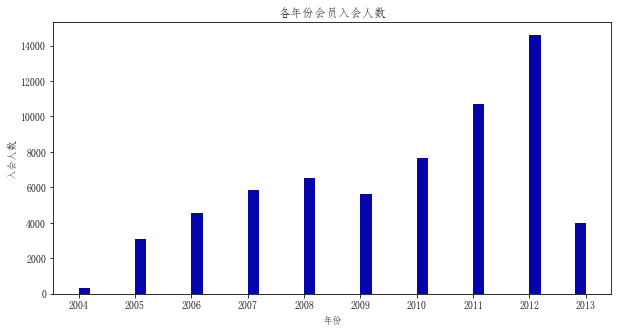

In [4]:
# 客户信息类别
# 提取会员入会年份
from datetime import datetime
ffp = data['FFP_DATE'].apply(lambda x:datetime.strptime(x,'%Y/%m/%d'))
ffp_year = ffp.map(lambda x : x.year)
# 绘制各年份会员入会人数直方图
fig = plt.figure(figsize=(10 ,5))  # 设置画布大小

plt.hist(ffp_year, bins='auto', color='#0504aa')
plt.xlabel('年份')
plt.ylabel('入会人数')
plt.title('各年份会员入会人数')
plt.xticks(range(2004,2014))
plt.show()


如上图所示，入会人数随年份增长而增加在2012年达到最高峰。

2.观察会员性别比例

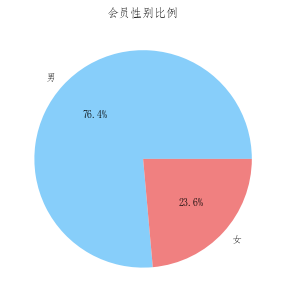

In [5]:
# 提取会员不同性别人数
male = pd.value_counts(data['GENDER'])['男']
female = pd.value_counts(data['GENDER'])['女']
# 绘制会员性别比例饼图
fig = plt.figure(figsize=(8 ,5))  # 设置画布大小
plt.pie([ male, female], labels=['男','女'], colors=['lightskyblue', 'lightcoral'],
       autopct='%1.1f%%')
plt.title('会员性别比例')
plt.show()


3.会员各级别人数

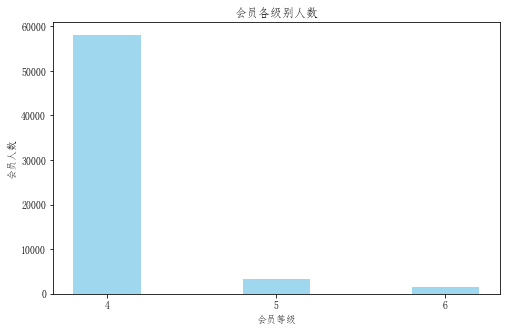

In [6]:
# 提取不同级别会员的人数
lv_four = pd.value_counts(data['FFP_TIER'])[4]
lv_five = pd.value_counts(data['FFP_TIER'])[5]
lv_six = pd.value_counts(data['FFP_TIER'])[6]
# 绘制会员各级别人数条形图
fig = plt.figure(figsize=(8 ,5))  # 设置画布大小
plt.bar(x=range(3), height=[lv_four,lv_five,lv_six], width=0.4, alpha=0.8, color='skyblue')
plt.xticks([index for index in range(3)], ['4','5','6'])
plt.xlabel('会员等级')
plt.ylabel('会员人数')
plt.title('会员各级别人数')
plt.show()


In [7]:
from pyecharts import options as opts
from pyecharts.charts import Bar
# 提取不同级别会员的人数
lv_four = pd.value_counts(data['FFP_TIER'])[4].tolist()
lv_five = pd.value_counts(data['FFP_TIER'])[5].tolist()
lv_six = pd.value_counts(data['FFP_TIER'])[6].tolist()
# 绘制会员各级别人数条形图

bar = Bar()
bar.add_xaxis(['4','5','6'])
bar.add_yaxis(series_name='会员各级别人数',y_axis=[lv_four,lv_five,lv_six],bar_width=80)
bar.width='650px'
bar_category_gap = '20%'

bar.set_global_opts(
    xaxis_opts=opts.AxisOpts(name='会员等级'),
                    yaxis_opts=opts.AxisOpts(name='会员人数',),
                    title_opts=opts.TitleOpts(title='会员各级别人数', pos_left='center'),
                    legend_opts=opts.LegendOpts(pos_top='10%'),
                    )
bar.render_notebook()

4. 绘制会员年龄分布箱型图

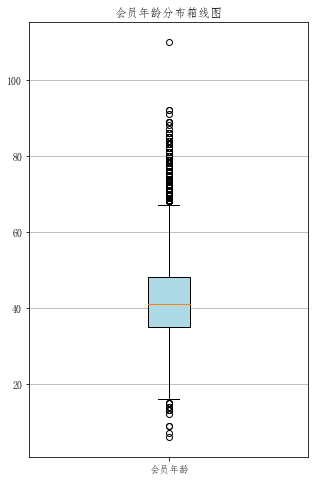

In [8]:
# 提取会员年龄
age = data['AGE'].dropna()

age = age.astype('int64')

fig = plt.figure(figsize=(5 ,8))
plt.boxplot(age, 
            patch_artist=True,
            labels = ['会员年龄'],  # 设置x轴标题
            boxprops = {'facecolor':'lightblue'})  # 设置填充颜色
plt.title('会员年龄分布箱线图')
# 显示y坐标轴的底线
plt.grid(axis='y')
plt.show()


根据箱图可以看出大部分会员年龄集中在30~50岁之间，极少量的会员年龄小于20岁或高于60岁，且存在一个超过100岁的异常数据。

5.对FLIGHT_COUNT（飞行次数），SEG_KM_SUM（总公里数），AGE（年龄）EXCHANGE_COUNT（积分兑换次数），Points_Sum（总累计积分）等属性进行相关性分析

<ipython-input-9-33cd110b436d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_corr['AGE'] = age1.astype('int64')


相关性矩阵为：
                 FFP_TIER  FLIGHT_COUNT  LAST_TO_END  SEG_KM_SUM  \
FFP_TIER        1.000000      0.582447    -0.206313    0.522350   
FLIGHT_COUNT    0.582447      1.000000    -0.404999    0.850411   
LAST_TO_END    -0.206313     -0.404999     1.000000   -0.369509   
SEG_KM_SUM      0.522350      0.850411    -0.369509    1.000000   
EXCHANGE_COUNT  0.342355      0.502501    -0.169717    0.507819   
Points_Sum      0.559249      0.747092    -0.292027    0.853014   
AGE             0.076245      0.075309    -0.027654    0.087285   

                EXCHANGE_COUNT  Points_Sum       AGE  
FFP_TIER              0.342355    0.559249  0.076245  
FLIGHT_COUNT          0.502501    0.747092  0.075309  
LAST_TO_END          -0.169717   -0.292027 -0.027654  
SEG_KM_SUM            0.507819    0.853014  0.087285  
EXCHANGE_COUNT        1.000000    0.578581  0.032760  
Points_Sum            0.578581    1.000000  0.074887  
AGE                   0.032760    0.074887  1.000000  


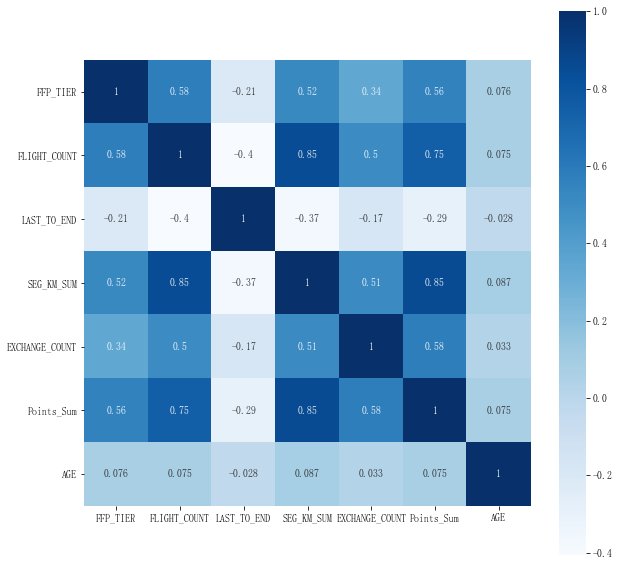

<function matplotlib.pyplot.close(fig=None)>

In [9]:
# 提取属性并合并为新数据集
data_corr = data[['FFP_TIER','FLIGHT_COUNT','LAST_TO_END',
                  'SEG_KM_SUM','EXCHANGE_COUNT','Points_Sum']]
age1 = data['AGE'].fillna(0)
data_corr['AGE'] = age1.astype('int64')


# 计算相关性矩阵
dt_corr = data_corr.corr(method='pearson')
print('相关性矩阵为：\n',dt_corr)

# 绘制热力图
import seaborn as sns
plt.subplots(figsize=(10, 10)) # 设置画面大小 
sns.heatmap(dt_corr, annot=True, vmax=1, square=True, cmap='Blues') 
plt.show()
plt.close


可以看出相关性较高的有：<br>
1：飞行次数与总公里数<br>
2：总公里数与总累计积分<br>

In [10]:
data.isnull().sum().value_counts()

0       37
3248     1
551      1
420      1
2269     1
26       1
138      1
3        1
dtype: int64

### 二.数据清洗

（1）丢弃带有缺失值的数据 <br>
（2）保留票价不为0的且总飞行公里数大于0的记录。<br>
（3）丢弃年龄大于100的记录。<br>

In [11]:
airline_data = data
print('原始数据的形状为：',airline_data.shape)

# 去除票价为空的记录
airline_notnull = airline_data.dropna(how='any')
print('删除缺失记录后数据的形状为：',airline_notnull.shape)

# 只保留票价非零的且总飞行公里数大于0的记录。
index1 = airline_notnull['SUM_YR_1'] != 0
index2 = airline_notnull['SUM_YR_2'] != 0
index3 = airline_notnull['SEG_KM_SUM']> 0
index4 = airline_notnull['AGE'] > 100  # 去除年龄大于100的记录
airline = airline_notnull[(index1 | index2) & index3 & ~index4]
print('数据清洗后数据的形状为：',airline.shape)

原始数据的形状为： (62988, 44)
删除缺失记录后数据的形状为： (58255, 44)
数据清洗后数据的形状为： (58014, 44)


### 三.属性规约
本案例的目标是客户价值分析，即通过航空公司客户数据识别不同价值的客户，识别客户价值
应用最广泛的模型是RFM模型。
（1）RFM模型
①R（Recency）

R（Recency）指的是最近一次消费时间与截止时间的间隔。通常情况下，最近一次消费时间与
截止时间的间隔越短，对即时提供的商品或是服务也最有可能感兴趣。这也是为什么，消费时
间间隔0至6个月的顾客收到的沟通信息多于1年以上的顾客。

最近一次消费时间与截止时间的间隔不仅能够为确定促销客户群体提供依据，还能够从中得出
企业发展的趋势。如果分析报告显示最近一次消费时间很近的客户在增加，则表示该公司是个
稳步上升的公司。反之，最近一次消费时间很近的客户越来越少，则说明该公司需要找到问题
所在，及时调整营销策略。

②F（Frequency）

F（Frequency）指顾客在某段时间内所消费的次数。可以说消费频率越高的顾客，也是满意度
越高的顾客，其忠诚度也就越高，顾客价值也就越大。增加顾客购买的次数意味着从竞争对手
处偷取市场占有率，赚取营业额。商家需要做的，是通过各种营销方式，去不断的刺激顾客消
费，提高他们的消费频率，提升店铺的复购率。

③M（Monetary）

M（Monetary）指顾客在某段时间内所消费的金额。消费金额越大的顾客，他们的消费能力自然
也就越大，这就是所谓“20%的顾客贡献了80%的销售额”的二八法则。而这批顾客也必然是商
家在进行营销活动时需要特别照顾的群体，尤其是在商家前期资源不足的时候。不过需要注意
一点，不论采用哪种营销方式，以不对顾客造成骚扰为大前提，否则营销只会产生负面效果。

在RFM模型理论中，最近一次消费时间与截止时间的间隔，消费频率，消费金额是测算客户价值
最重要的特征，这三个特征对营销活动的具有十分重要的意义。其中，近一次消费时间与截止时
间的间隔是最有力的特征。


### LRFMC模型：
L：客户入会日期距现在相隔时间<br>
R：客户最近一次乘坐飞机距离现在的时间<br>
F：客户乘飞机次数<br>
M：客户累计的飞行里程<br>
C：客户在乘机期间总的折扣平均系数<br>

In [12]:
df = airline[['FFP_DATE','LOAD_TIME','LAST_TO_END',
             'FLIGHT_COUNT','SEG_KM_SUM','avg_discount']]
df.head()

,FFP_DATE,LOAD_TIME,LAST_TO_END,FLIGHT_COUNT,SEG_KM_SUM,avg_discount
0,2006/11/2,2014/3/31,1,210,580717,0.961639
2,2007/2/1,2014/3/31,11,135,283712,1.254676
3,2008/8/22,2014/3/31,97,23,281336,1.090870
4,2009/4/10,2014/3/31,5,152,309928,0.970658
5,2008/2/10,2014/3/31,79,92,294585,0.967692


In [13]:
# 构造属性L
L = pd.to_datetime(df['LOAD_TIME']) - pd.to_datetime(df['FFP_DATE'])
L = L.astype('str').str.split().str[0]
L = L.astype('int')/30

# 合并属性
airline_features = pd.concat([L,df.iloc[:,2:]],axis=1)
print('构建的LRFMC属性前5行为：\n',airline_features.head())

# 数据标准化
from sklearn.preprocessing import StandardScaler
data = StandardScaler().fit_transform(airline_features)
print('标准化后LRFMC五个属性为：\n',data[:5,:])


构建的LRFMC属性前5行为：
            0  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
0  90.200000            1           210      580717      0.961639
2  87.166667           11           135      283712      1.254676
3  68.233333           97            23      281336      1.090870
4  60.533333            5           152      309928      0.970658
5  74.700000           79            92      294585      0.967692
标准化后LRFMC五个属性为：
 [[ 1.47969133 -0.94014902 13.88227737 26.82688942  1.31043074]
 [ 1.37139661 -0.88484043  8.62121549 12.68260168  2.90579167]
 [ 0.69544716 -0.40918653  0.76469641 12.56944928  2.01399274]
 [ 0.42054519 -0.91802558  9.81372285 13.93108789  1.35953154]
 [ 0.92631722 -0.508742    5.60487334 13.20040724  1.34338713]]


## 四:K-means聚类分析

In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans  # 导入kmeans算法

# 读取标准化后的数据
airline_scale = data
k = 5  # 确定聚类中心数

# 构建模型，随机种子设为123
kmeans_model = KMeans(n_clusters=k,n_jobs=4,random_state=123)
fit_kmeans = kmeans_model.fit(airline_scale)  # 模型训练

# 查看聚类结果
kmeans_cc = kmeans_model.cluster_centers_  # 聚类中心
print('各类聚类中心为：\n',kmeans_cc)
kmeans_labels = kmeans_model.labels_  # 样本的类别标签
print('各样本的类别标签为：\n',kmeans_labels)
r1 = pd.Series(kmeans_model.labels_).value_counts()  # 统计不同类别样本的数目
print('最终每个类别的数目为：\n',r1)
# 输出聚类分群的结果
cluster_center = pd.DataFrame(kmeans_model.cluster_centers_,\
             columns=['L','R','F','M','C'])   # 将聚类中心放在数据框中


D:\ANACONDA\lib\site-packages\sklearn\cluster\_kmeans.py:938: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"


各类聚类中心为：
 [[-0.68964495 -0.42016987 -0.15815269 -0.15456528 -0.29736929]
 [ 0.51491019 -0.79604744  2.48452133  2.43178399  0.33580436]
 [-0.32910396  1.70361877 -0.5772246  -0.54292902 -0.21782656]
 [-0.08773226  0.02705354 -0.27685377 -0.29774612  1.89869498]
 [ 1.18682806 -0.37759773 -0.07802506 -0.08425079 -0.14773583]]
各样本的类别标签为：
 [1 1 1 ... 2 0 2]
最终每个类别的数目为：
 0    22570
4    14373
2    11019
3     5043
1     5009
dtype: int64


[-0.6896449545355586, 0.5149101948068262, -0.32910396288526705, -0.08773226443148842, 1.186828055277068]
[[-0.68964495 -0.42016987 -0.15815269 -0.15456528 -0.29736929 -0.68964495]
 [ 0.51491019 -0.79604744  2.48452133  2.43178399  0.33580436  0.51491019]
 [-0.32910396  1.70361877 -0.5772246  -0.54292902 -0.21782656 -0.32910396]
 [-0.08773226  0.02705354 -0.27685377 -0.29774612  1.89869498 -0.08773226]
 [ 1.18682806 -0.37759773 -0.07802506 -0.08425079 -0.14773583  1.18682806]]
5
[0.         1.25663706 2.51327412 3.76991118 5.02654825 0.        ]


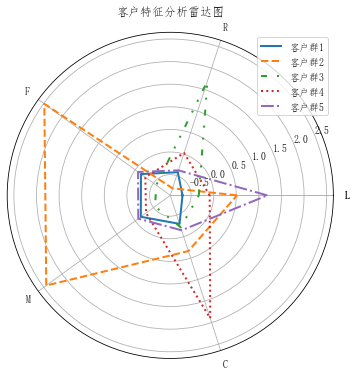

<function matplotlib.pyplot.close(fig=None)>

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt 
# 客户分群雷达图
labels = ['L','R','F','M','C']

legen = ['客户群' + str(i + 1) for i in cluster_center.index]  # 客户群命名，作为雷达图的图例
lstype = ['-','--',(0, (3, 5, 1, 5, 1, 5)),':','-.']
kinds = list(cluster_center.iloc[:, 0])
print(kinds)
# 由于雷达图要保证数据闭合，因此再添加L列，并转换为 np.ndarray
cluster_center = pd.concat([cluster_center, cluster_center[['L']]], axis=1)
centers = np.array(cluster_center.iloc[:, 0:])
print(centers)
# 分割圆周长，并让其闭合
n = len(labels)
print(n)
angle = np.linspace(0, 2 * np.pi, n, endpoint=False)
angle = np.concatenate((angle, [angle[0]]))
print(angle)
# 绘图
fig = plt.figure(figsize=(8,6))
ax = plt.subplot(111, polar=True)  # 以极坐标的形式绘制图形

# 添加属性标签
# 画线
for i in range(len(kinds)):
    ax.plot(angle, centers[i], linestyle=lstype[i], linewidth=2, label=kinds[i])

labels = np.concatenate((labels, [labels[0]]))
ax.set_thetagrids(angle * 180 / np.pi, labels)
plt.title('客户特征分析雷达图')
plt.legend(legen)
plt.show()
plt.close


L：客户入会日期距现在相隔时间<br>
R：客户最近一次乘坐飞机距离现在的时间<br>
F：客户乘飞机次数<br>
M：客户累计的飞行里程<br>
C：客户在乘机期间总的折扣平均系数<br>

结合业务分析，通过比较各个特征在群间的大小对某一个群的特征进行评价分析。<br>
其中客户群1在所有特征上的值都很小，且在特征L处的值最小，说明客户群1属于新入会会员较多的客户群<br>
客户群2在特征F和M上的值最大，且在特征R上的值最小，说明客户群2的会员频繁乘机且近期都有乘机记录<br>
客户群3在特征R处的值最大，在特征L、F、M和C处的值都较小，说明客户群3已经很久没有乘机，是入会时间较短的低价值的客户群<br>
客户群4在特征C处的值最大，在特征F、M处的值较小，说明客户群4是偏好乘坐高级舱位的客户群<br>
客户群5在特征L处的值最大，在特征R处的值较小，其他特征值都比较适中，说明客户群5入会时间较长，飞行频率也较高，是有较高的价值的客户群。


[{'大学英语': 87, '高等数学': 79, '体育': 95, '计算机基础': 92, '程序设计': 85}, {'大学英语': 80, '高等数学': 90, '体育': 91, '计算机基础': 85, '程序设计': 88}]
5
[87 79 95 92 85 87]
[0.         1.25663706 2.51327412 3.76991118 5.02654825 0.        ]


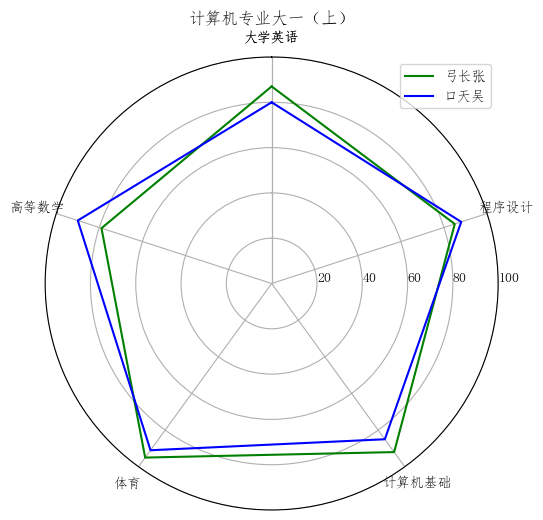

In [3]:
# coding=utf-8
import numpy as np
import matplotlib.pyplot as plt
 
 
results = [{"大学英语": 87, "高等数学": 79, "体育": 95, "计算机基础": 92, "程序设计": 85},
           {"大学英语": 80, "高等数学": 90, "体育": 91, "计算机基础": 85, "程序设计": 88}]
print(results)
data_length = len(results[0])
print(data_length)
# 将极坐标根据数据长度进行等分
angles = np.linspace(0, 2*np.pi, data_length, endpoint=False)
labels = [key for key in results[0].keys()]
score = [[v for v in result.values()] for result in results]
#print(score)
# 使雷达图数据封闭
score_a = np.concatenate((score[0], [score[0][0]]))
print(score_a)
score_b = np.concatenate((score[1], [score[1][0]]))
angles = np.concatenate((angles, [angles[0]]))
print(angles)
labels = np.concatenate((labels, [labels[0]]))
# 设置图形的大小
fig = plt.figure(figsize=(8, 6), dpi=100)
# 新建一个子图
ax = plt.subplot(111, polar=True)
# 绘制雷达图
ax.plot(angles, score_a, color='g')
ax.plot(angles, score_b, color='b')
# 设置雷达图中每一项的标签显示
ax.set_thetagrids(angles*180/np.pi, labels)
# 设置雷达图的0度起始位置
ax.set_theta_zero_location('N')
# 设置雷达图的坐标刻度范围
ax.set_rlim(0, 100)
# 设置雷达图的坐标值显示角度，相对于起始角度的偏移量
ax.set_rlabel_position(270)
ax.set_title("计算机专业大一（上）")
plt.legend(["弓长张", "口天吴"], loc='best')
plt.show()

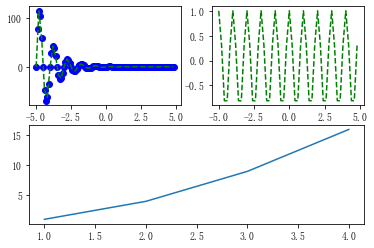

In [17]:
import matplotlib.pyplot as plt
import numpy as np

def f(t):
    return np.exp(-t) * np.sin(2 * np.pi * t)


if __name__ == '__main__':
    t1 = np.arange(-5, 5, 0.1)
    t2 = np.arange(-5, 5, 0.2)
    plt.figure()
    plt.subplot(221)
    plt.plot(t1, f(t1), 'bo', t2, f(t2), 'g--')
    plt.subplot(222)
    plt.plot(t2, np.cos(2 * np.pi * t2), 'g--')
    plt.subplot(212)
    plt.plot([1, 2, 3, 4], [1, 4, 9, 16])
    plt.show()